# Cinco Traços de Personalidade (OCEAN)

Os Cinco Grandes traços de personalidade, também conhecidos como o modelo de cinco fatores (FFM) e o modelo OCEAN, é uma taxonomia, ou agrupamento, para traços de personalidade. Quando a análise fatorial (uma técnica estatística) é aplicada aos dados da pesquisa de personalidade, algumas palavras usadas para descrever aspectos da personalidade são frequentemente aplicadas à mesma pessoa. Por exemplo, alguém descrito como consciencioso tem mais probabilidade de ser descrito como "sempre preparado" do que como "bagunceiro". Esta teoria é baseada, portanto, na associação entre palavras, mas não em experimentos neuropsicológicos. Essa teoria usa descritores da linguagem comum e, portanto, sugere cinco grandes dimensões comumente usadas para descrever a personalidade e a psique humanas.

Este conjunto de dados contém 1.015.342 respostas de questionários coletados online pela Open Psychometrics.

https://openpsychometrics.org/tests/IPIP-BFFM/

A base de dados foi obtida do Kaggle:

https://www.kaggle.com/tunguz/big-five-personality-test

O objetivo deste notebook é usar o K-Means Clustering no Python com scikit-learn para classificar as respostas do teste em grupos. O K-Means é um algoritmo com aprendizagem não supervisionada, que agrupará as respostas por similaridade. Com o resultado, faremos uma página para inclusão e classificação de novos dados.

## Análise exploratória

Importando as bibliotecas:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from io import open

pd.options.display.max_columns = 150

Carregando o dataset:

In [3]:
data = pd.read_csv('data-final.csv', sep='\t')

Verificando o dataset:

In [4]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,9419.0,5491.0,3959.0,4821.0,5611.0,2756.0,2388.0,2113.0,5900.0,4110.0,6135.0,4150.0,5739.0,6364.0,3663.0,5070.0,5709.0,4285.0,2587.0,3997.0,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,7235.0,3598.0,3315.0,2564.0,2976.0,3050.0,4787.0,3228.0,3465.0,3309.0,9036.0,2406.0,3484.0,3359.0,3061.0,2539.0,4226.0,2962.0,1799.0,1607.0,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,4657.0,3549.0,2543.0,3335.0,5847.0,2540.0,4922.0,3142.0,14621.0,2191.0,5128.0,3675.0,3442.0,4546.0,8275.0,2185.0,2164.0,1175.0,3813.0,1593.0,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,3996.0,2896.0,5096.0,4240.0,5168.0,5456.0,4360.0,4496.0,5240.0,4000.0,3736.0,4616.0,3015.0,2711.0,3960.0,4064.0,4208.0,2936.0,7336.0,3896.0,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,6004.0,3965.0,2721.0,3706.0,2968.0,2426.0,7339.0,3302.0,16819.0,3731.0,4740.0,2856.0,7461.0,2179.0,3324.0,2255.0,4308.0,4506.0,3127.0,3115.0,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


Excluindo atributos irrelevantes, como tempo de resposta, dados de localização, dados da tela, etc. O objetivo é usar apenas as respostas das questões.

In [5]:
data.drop(data.columns[50:110], axis=1, inplace=True)

Verificando os dados novamente:

In [6]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


Analisando estatísticas da base de dados:

In [7]:
pd.options.display.float_format = '{:.2f}'.format #formatando os dados como float

In [8]:
data.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00
mean,2.65,2.77,3.29,3.14,3.28,2.40,2.77,3.41,2.96,3.56,3.29,3.17,3.85,2.66,2.84,2.84,3.05,2.68,3.09,2.77,2.26,3.83,2.26,3.93,2.27,3.74,2.20,3.69,3.79,3.59,3.30,2.93,3.98,2.62,2.63,2.83,3.70,2.47,3.20,3.59,3.65,2.08,4.00,2.00,3.79,1.89,3.98,3.18,4.12,3.96
std,1.26,1.32,1.22,1.24,1.28,1.23,1.40,1.27,1.35,1.31,1.35,1.23,1.16,1.25,1.27,1.33,1.29,1.34,1.30,1.32,1.34,1.14,1.28,1.13,1.17,1.22,1.12,1.10,1.17,1.08,1.18,1.39,1.04,1.25,1.27,1.42,1.13,1.14,1.28,1.05,1.16,1.11,1.10,1.09,0.99,1.10,1.01,1.26,1.04,1.03
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,2.00,4.00,3.00
50%,3.00,3.00,3.00,3.00,3.00,2.00,3.00,4.00,3.00,4.00,3.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,2.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,4.00,4.00,3.00,3.00,4.00,2.00,3.00,3.00,4.00,2.00,3.00,4.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,4.00
75%,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,4.00,5.00,4.00,4.00,5.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,5.00,3.00,5.00,3.00,5.00,3.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,3.00,4.00,4.00,5.00,3.00,5.00,3.00,5.00,2.00,5.00,4.00,5.00,5.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


- o método describe já mostrou um problema com a base de dados: o valor mínimo em todas as perguntas é zero, mas na realidade, os valores variam de 1 a 5.
- será necessário corrigir esser ruído na base de dados.

Verificando a contagem de registros por valor na primeira coluna:

In [9]:
data['EXT1'].value_counts()

3.00    288622
1.00    249711
2.00    199165
4.00    191638
5.00     80702
0.00      3720
Name: EXT1, dtype: int64

- podemos ver que existem 3720 registros do valor zero somente na primeira questão.

O primeiro passo será a exclusão destes registros com valor igual a zero. Antes da exclusão, vamos selecionar todos os registros com valor zero.

In [10]:
data[(data == 0.0).all(axis=1)].describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00
mean,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Filtrando o dataframe pela seleção de todos os valores maiores que zero:

In [12]:
data = data[(data > 0.00).all(axis=1)]

Verificando o valor mínimo da base de dados:

In [14]:
data.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00
mean,2.65,2.80,3.30,3.17,3.30,2.41,2.78,3.44,2.98,3.59,3.31,3.20,3.87,2.69,2.85,2.87,3.06,2.69,3.10,2.80,2.25,3.87,2.27,3.96,2.29,3.78,2.21,3.72,3.81,3.62,3.34,2.95,4.00,2.63,2.63,2.84,3.73,2.48,3.22,3.63,3.70,2.07,4.04,2.00,3.82,1.90,4.02,3.22,4.17,3.98
std,1.25,1.31,1.19,1.21,1.24,1.21,1.38,1.24,1.33,1.27,1.32,1.19,1.13,1.23,1.25,1.30,1.27,1.32,1.27,1.31,1.32,1.08,1.27,1.08,1.16,1.17,1.11,1.04,1.13,1.03,1.12,1.37,1.00,1.23,1.25,1.40,1.08,1.12,1.25,1.00,1.10,1.10,1.04,1.07,0.93,1.08,0.94,1.22,0.97,0.99
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,2.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,3.00,1.00,3.00,1.00,3.00,1.00,4.00,2.00,4.00,3.00
50%,3.00,3.00,3.00,3.00,3.00,2.00,3.00,4.00,3.00,4.00,3.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,2.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,4.00,4.00,3.00,3.00,4.00,2.00,2.00,3.00,4.00,2.00,3.00,4.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,4.00
75%,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,4.00,5.00,4.00,4.00,5.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,5.00,3.00,5.00,3.00,5.00,3.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,3.00,4.00,4.00,5.00,3.00,5.00,3.00,5.00,2.00,5.00,4.00,5.00,5.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


- o valor mínimo agora é 1, como é esperado para as questões deste teste.

Verificando novamente os valores da primeira coluna:

In [15]:
data['EXT1'].value_counts()

3.00    247835
1.00    216949
2.00    176207
4.00    166599
5.00     66844
Name: EXT1, dtype: int64

- agora a primeira coluna só tem valores de 1 a 5.

## Definição do número de clusters

O próximo passo é a definição do número de clusters que serão usados para agrupar a base de dados.

O nosso problema é baseado em cinco traços de personalidade. Então, vamos agrupar a nossa base de dados em cinco grupos.

Mas para outros problemas em que o número de agrupamentos não é tão óbvio, existem métodos para calcular o número ideal de clusters. Vamos utilizar o Elbow Method para demonstrar a definição de clusters.

Instalando o Yellowbrick, que é um pacote de ferramentas de diagnóstico e análise visual projetadas para facilitar o aprendizado de máquina com o scikit-learn:

In [16]:
!pip install yellowbrick

In [17]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

Instanciando o KMeans e o Visualizer:

In [18]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,10))

- O KElbowVisualizer vai testar o número ideal de clusters, variando de 2 a 10.

Selecionando uma amostra aleatória dos dados com 5000 observações:

In [20]:
data_sample = data.sample(n=5000, random_state=1)

## Executando o teste

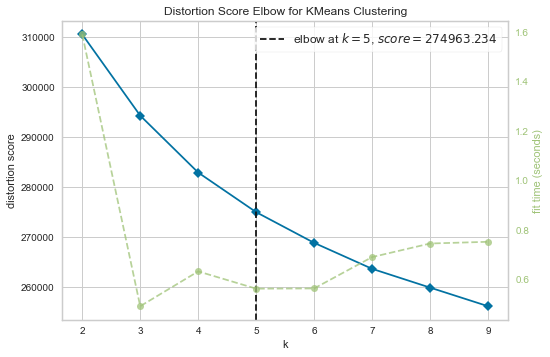

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
visualizer.fit(data_sample)
visualizer.poof()

- como esperado, o resultado do teste indica que devemos utilizar 5 clusters para agrupar os dados.

## Treinando o modelo e agrupando os resultados

Atribuindo os registros aos devidos grupos:

In [22]:
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(data)

Inserindo os rótulos dos clusters no dataframe:

In [23]:
pred = k_fit.labels_
data['Clusters'] = pred

Verificando os dados:

In [24]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.00,1.00,5.00,2.00,5.00,1.00,5.00,2.00,4.00,1.00,1.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,5.00,2.00,4.00,2.00,3.00,2.00,4.00,3.00,4.00,3.00,4.00,3.00,2.00,2.00,4.00,4.00,2.00,4.00,4.00,5.00,1.00,4.00,1.00,4.00,1.00,5.00,3.00,4.00,5.00,0
1,3.00,5.00,3.00,4.00,3.00,3.00,2.00,5.00,1.00,5.00,2.00,3.00,4.00,1.00,3.00,1.00,2.00,1.00,3.00,1.00,1.00,4.00,1.00,5.00,1.00,5.00,3.00,4.00,5.00,3.00,3.00,2.00,5.00,3.00,3.00,1.00,3.00,3.00,5.00,3.00,1.00,2.00,4.00,2.00,3.00,1.00,4.00,2.00,5.00,3.00,4
2,2.00,3.00,4.00,4.00,3.00,2.00,1.00,3.00,2.00,5.00,4.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,4.00,1.00,4.00,2.00,4.00,1.00,4.00,4.00,3.00,4.00,2.00,2.00,2.00,3.00,3.00,4.00,2.00,4.00,2.00,5.00,1.00,2.00,1.00,4.00,2.00,5.00,3.00,4.00,4.00,4
3,2.00,2.00,2.00,3.00,4.00,2.00,2.00,4.00,1.00,4.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,4.00,3.00,2.00,4.00,3.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,2.00,4.00,4.00,4.00,1.00,2.00,2.00,3.00,1.00,4.00,4.00,2.00,5.00,2.00,3.00,1.00,4.00,4.00,3.00,3.00,2
4,3.00,3.00,3.00,3.00,5.00,3.00,3.00,5.00,3.00,4.00,1.00,5.00,5.00,3.00,1.00,1.00,1.00,1.00,3.00,2.00,1.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,5.00,3.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,1.00,5.00,5.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,3.00,5.00,5.00,0


## Analisando os grupos

Qual é a quantidade de observações em cada grupo?

In [26]:
data['Clusters'].value_counts()

3    193878
4    182675
0    181482
1    171794
2    144605
Name: Clusters, dtype: int64

Agrupando os registros por grupo:

In [27]:
data.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.48,1.94,4.34,2.21,4.28,1.66,3.90,2.80,3.77,2.51,2.32,3.85,3.14,3.32,2.11,1.91,2.11,1.67,2.12,1.72,1.89,4.45,1.85,4.25,1.87,3.85,1.60,4.10,4.09,4.20,3.74,2.60,4.19,1.91,3.12,2.30,3.87,1.95,3.58,3.89,3.91,1.75,4.10,1.79,4.17,1.66,4.33,3.26,4.11,4.30
1,1.80,3.64,2.24,4.07,2.30,3.19,1.74,4.09,2.16,4.49,4.29,2.45,4.53,2.13,3.57,3.90,4.00,3.78,4.01,3.96,2.45,3.39,2.57,3.86,2.54,3.88,2.70,3.45,3.69,3.07,2.84,3.36,3.82,3.48,2.10,3.49,3.58,3.04,2.79,3.32,3.52,2.38,4.07,2.12,3.43,2.09,3.69,3.18,4.29,3.72
2,2.16,3.44,2.80,3.58,2.62,2.86,2.13,3.70,2.71,3.98,2.44,3.72,3.13,2.99,2.40,2.11,2.41,2.02,2.71,2.39,3.10,2.99,2.68,2.85,3.29,2.74,3.15,2.94,2.67,3.07,3.27,2.93,3.82,2.49,2.43,2.83,3.54,2.60,2.88,3.51,3.73,1.95,3.80,2.05,3.80,2.05,4.09,3.32,3.91,3.85
3,3.45,1.92,3.79,2.51,4.05,1.82,3.65,2.77,3.77,3.01,3.84,2.94,4.26,2.41,3.29,3.49,3.82,3.47,3.66,3.19,2.14,4.30,2.65,4.20,2.00,4.02,1.85,3.91,4.14,3.86,2.99,3.62,3.86,3.24,2.23,3.52,3.48,2.83,2.95,3.50,3.78,2.10,4.27,1.95,3.97,1.76,3.99,3.40,4.22,4.21
4,2.14,3.28,3.13,3.64,3.00,2.69,2.24,3.99,2.34,4.12,3.50,3.11,4.14,2.64,2.81,2.78,2.84,2.40,2.94,2.68,1.86,3.98,1.67,4.38,1.96,4.18,1.99,4.00,4.19,3.74,3.85,2.22,4.29,2.01,3.25,2.06,4.17,2.02,3.84,3.89,3.56,2.16,3.87,2.08,3.71,2.00,4.00,2.95,4.25,3.78


Acima podemos ver a média por questão, mas será mais informativo ver as médias por grupo de questões:

Selecionando as colunas de cada grupo:

In [28]:
col_list = list(data)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

Somando os valores de cada grupo:

In [31]:
data_soma = pd.DataFrame()
data_soma['extroversion'] = data[ext].sum(axis=1)/10
data_soma['neurotic'] = data[est].sum(axis=1)/10
data_soma['agreeable'] = data[agr].sum(axis=1)/10
data_soma['conscientious'] = data[csn].sum(axis=1)/10
data_soma['open'] = data[opn].sum(axis=1)/10
data_soma['clusters'] = pred

Exibindo o valor médio por grupo:

In [32]:
data_soma.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,3.09,2.43,3.21,3.11,3.34
1,2.97,3.66,3.16,3.18,3.25
2,3.00,2.63,2.95,3.03,3.26
3,3.07,3.44,3.31,3.22,3.37
4,3.06,2.98,3.19,3.16,3.24


Visualizando as médias por grupo:

In [33]:
data_clusters = data_soma.groupby('clusters').mean()

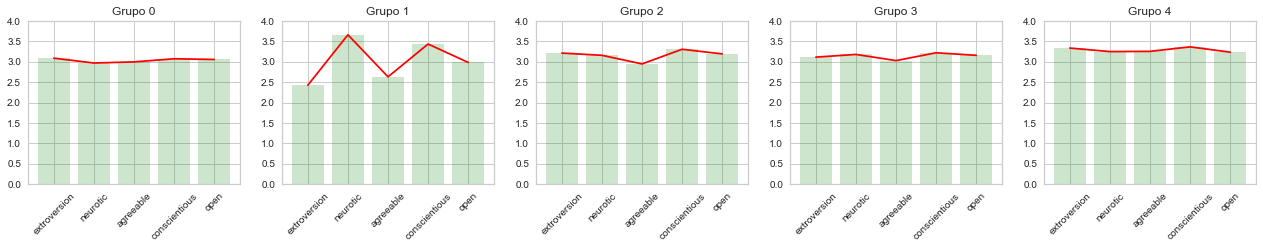

In [35]:
plt.figure(figsize=(22,3))
for i in range(0,5):
    plt.subplot(1,5,i+1)
    plt.bar(data_clusters.columns, data_clusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(data_clusters.columns, data_clusters.iloc[:, i], color='red')
    plt.title('Grupo ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4)

## Testando o modelo com novos dados

Agora vamos testar novos dados que serão inseridos pelo usuário. Vamos criar uma interface com as mesmas questões do texte e com um "slider" com valores de 1 a 5 para a resposta. As questões utilizadas foram obtidas do Kaggle à partir do arquivo 'codebook.txt': https://www.kaggle.com/tunguz/big-five-personality-test

Criando uma interface para a entrada de novos dados com o Gradio:

In [38]:
!pip install gradio

  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4714 sha256=f99294776079cdeb19dea9ac1dce50f71b4995ba4585d5d4db5fb1e5d3fcaf55
  Stored in directory: c:\users\daniele\appdata\local\pip\cache\wheels\ff\5b\59\913b443e7369dc04b61f607a746b6f7d83fb65e2e19fcc958d
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-py3-none-any.whl size=3376 sha256=1b24c618a85c56b8d3edbb890bf7bd48bf82bf3af12f7ce6c219954fc49ee460
  Stored in directory: c:\users\daniele\appdata\local\pip\cache\wheels\27\1b\de\34a3e06893944387266e2e7e93d33243589f01ac1b451e367b
Successfully built ffmpy flask-cachebuster


In [39]:
import gradio as gr

Lendo o arquivo com as questões:

In [40]:
dict_questions = open('questions.txt').read().split('\n')

Verificando os dados:

In [41]:
dict_questions

['EXT1\tI am the life of the party.',
 "EXT2\tI don't talk a lot.",
 'EXT3\tI feel comfortable around people.',
 'EXT4\tI keep in the background.',
 'EXT5\tI start conversations.',
 'EXT6\tI have little to say.',
 'EXT7\tI talk to a lot of different people at parties.',
 "EXT8\tI don't like to draw attention to myself.",
 "EXT9\tI don't mind being the center of attention.",
 'EXT10\tI am quiet around strangers.',
 'EST1\tI get stressed out easily.',
 'EST2\tI am relaxed most of the time.',
 'EST3\tI worry about things.',
 'EST4\tI seldom feel blue.',
 'EST5\tI am easily disturbed.',
 'EST6\tI get upset easily.',
 'EST7\tI change my mood a lot.',
 'EST8\tI have frequent mood swings.',
 'EST9\tI get irritated easily.',
 'EST10\tI often feel blue.',
 'AGR1\tI feel little concern for others.',
 'AGR2\tI am interested in people.',
 'AGR3\tI insult people.',
 "AGR4\tI sympathize with others' feelings.",
 "AGR5\tI am not interested in other people's problems.",
 'AGR6\tI have a soft heart.',


Removendo o identificador inicial e recuperando apenas as questões:

In [42]:
questions = []
for q in dict_questions:
    q = str(q)
    questions.append(q[q.find('\t'):].lstrip())

In [43]:
questions

['I am the life of the party.',
 "I don't talk a lot.",
 'I feel comfortable around people.',
 'I keep in the background.',
 'I start conversations.',
 'I have little to say.',
 'I talk to a lot of different people at parties.',
 "I don't like to draw attention to myself.",
 "I don't mind being the center of attention.",
 'I am quiet around strangers.',
 'I get stressed out easily.',
 'I am relaxed most of the time.',
 'I worry about things.',
 'I seldom feel blue.',
 'I am easily disturbed.',
 'I get upset easily.',
 'I change my mood a lot.',
 'I have frequent mood swings.',
 'I get irritated easily.',
 'I often feel blue.',
 'I feel little concern for others.',
 'I am interested in people.',
 'I insult people.',
 "I sympathize with others' feelings.",
 "I am not interested in other people's problems.",
 'I have a soft heart.',
 'I am not really interested in others.',
 'I take time out for others.',
 "I feel others' emotions.",
 'I make people feel at ease.',
 'I am always prepared.

Criando os inputs dinâmicos para passar ao gradio:

In [44]:
input_questions = []
for q in questions:
    obj_input = gr.inputs.Slider(minimum=1, maximum=5, step=1, default=3, label=q)
    input_questions.append(obj_input)

Verificando os inputs:

In [45]:
input_questions

[Slider(label="I am the life of the party."),
 Slider(label="I don't talk a lot."),
 Slider(label="I feel comfortable around people."),
 Slider(label="I keep in the background."),
 Slider(label="I start conversations."),
 Slider(label="I have little to say."),
 Slider(label="I talk to a lot of different people at parties."),
 Slider(label="I don't like to draw attention to myself."),
 Slider(label="I don't mind being the center of attention."),
 Slider(label="I am quiet around strangers."),
 Slider(label="I get stressed out easily."),
 Slider(label="I am relaxed most of the time."),
 Slider(label="I worry about things."),
 Slider(label="I seldom feel blue."),
 Slider(label="I am easily disturbed."),
 Slider(label="I get upset easily."),
 Slider(label="I change my mood a lot."),
 Slider(label="I have frequent mood swings."),
 Slider(label="I get irritated easily."),
 Slider(label="I often feel blue."),
 Slider(label="I feel little concern for others."),
 Slider(label="I am interested in

Criando a interface e a função predict:

In [46]:
import gradio as gr

In [48]:
def predict(*output_questions):
    output_questions = np.array(output_questions).reshape(1,-1)
    return k_fit.predict(output_questions)

iface = gr.Interface(fn = predict,
                    title = 'Big Five Personality',
                    description = 'Sistema para detecção de traços de personalidade',
                    inputs = input_questions,
                    outputs = 'text')

iface.launch(share=True)

Running locally at: http://127.0.0.1:7860/
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://20303.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7860/',
 'https://20303.gradio.app')